In [27]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
display(HTML("<style>.container {width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2
import bnpm

from pprint import pprint
from pathlib import Path
import time

import cv2

import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cage = 'cage_0916'
mouse = 'mouse_0916N'

In [7]:
directory_videos  = f'/mnt/MICROSCOPE/Gyu/BMI_data/{cage}/{mouse}'
filename_strMatch = 'cam4.*avi'  ## You can use regular expressions to search and match more complex strings
# filename_strMatch = 'cam4.*avi'  ## You can use regular expressions to search and match more complex strings


In [8]:
paths_videos = bnpm.path_helpers.find_paths(
    dir_outer=directory_videos,
    reMatch=filename_strMatch,  ## string to use to search for files in directory. Uses regular expressions!
    depth=5,  ## how many folders deep to search
    verbose=True,
)

display(paths_videos)

Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231022/camera_data/exp/cam4/cam42023-10-22T12_05_56.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231023/camera_data/exp/cam4/cam42023-10-23T11_36_48.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231024/camera_data/exp/cam4/cam42023-10-24T13_56_05.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231025/camera_data/exp/cam4/cam42023-10-25T12_51_29.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231026/camera_data/exp/cam4/cam42023-10-26T12_02_14.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231027/camera_data/exp/cam4/cam42023-10-27T12_09_44.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231028/camera_data/exp/cam4/cam42023-10-28T12_24_58.avi
Found file: /mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231029/camera_data/exp/cam4/cam42023-10-29T10_23_54.avi
Found file: /mnt/MICROSCOPE/Gyu/

['/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231022/camera_data/exp/cam4/cam42023-10-22T12_05_56.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231023/camera_data/exp/cam4/cam42023-10-23T11_36_48.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231024/camera_data/exp/cam4/cam42023-10-24T13_56_05.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231025/camera_data/exp/cam4/cam42023-10-25T12_51_29.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231026/camera_data/exp/cam4/cam42023-10-26T12_02_14.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231027/camera_data/exp/cam4/cam42023-10-27T12_09_44.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231028/camera_data/exp/cam4/cam42023-10-28T12_24_58.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231029/camera_data/exp/cam4/cam42023-10-29T10_23_54.avi',
 '/mnt/MICROSCOPE/Gyu/BMI_data/cage_0916/mouse_0916N/20231030/camera_data/exp/cam4/cam42023-10-3

In [9]:
import warnings
from tqdm import tqdm

def get_first_frames(paths, max_attempts=5, verbose=True):
    if isinstance(paths, list) == False:
        paths = [paths]

    def get_first_frame(path, attempt=0):
        frame = cv2.VideoCapture(path).read()[1]
        if frame is None:
            print(f"Received `None` for path: {path}. Attempting again; attempt number: {attempt}")
            if attempt + 1 > max_attempts:
                warnings.warn(f"Failed to get first frame for path:{path}")
                return None
            frame = get_first_frame(path, attempt=attempt+1)
        return frame

    flag_singleOutput = len(paths) == 1
    out = [get_first_frame(path) for path in tqdm(paths, disable=flag_singleOutput)]
    out = out[0] if flag_singleOutput else out
    
    return out
        

In [10]:
images = {path: get_first_frames(path) for path in tqdm(paths_videos[:])}

100%|███████████████████████████████████████████████████████████████████████████| 16/16 [01:39<00:00,  6.21s/it]


In [11]:
bnpm.file_helpers.pickle_save(
    obj=images,
    filepath=f'/media/rich/bigSSD/analysis_data/face_rhythm/{mouse}/eye_laser_trace_extraction/images.pkl',
    mkdir=True,
)

In [12]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
display(HTML("<style>.container {width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2
import bnpm

from pprint import pprint
from pathlib import Path
import time

import cv2

import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
images = bnpm.file_helpers.pickle_load(filepath=f'/media/rich/bigSSD/analysis_data/face_rhythm/{mouse}/eye_laser_trace_extraction/images.pkl')

In [14]:
import matplotlib as mpl

In [38]:
# %matplotlib widget
# rois = {p: bnpm.plotting_helpers.Select_ROI(images[p]) for p in paths_videos[:2]}

# rois = {}
for p in list(images.keys())[18:20]:
#     print(p)
    rois[p] = bnpm.plotting_helpers.Select_ROI(images[p], backend='module://ipympl.backend_nbagg')
#     gca = plt.gca()
#     gca.set_title(p[40:])
    
    time.sleep(0.5)
    

In [39]:
masks = {path: roi.mask_frames[0] for path, roi in rois.items()}

In [40]:
bnpm.file_helpers.pickle_save(
    obj={
        'masks': masks,
        'images': images,
    },
    filepath=f'/media/rich/bigSSD/analysis_data/face_rhythm/{mouse}/eye_masks.pkl',
)

In [41]:
masks = bnpm.file_helpers.pickle_load(filepath=f'/media/rich/bigSSD/analysis_data/face_rhythm/{mouse}/eye_masks.pkl')['masks']

In [42]:
folders_masks = {(Path(p).parent.parent.parent.parent.parent.name, Path(p).parent.parent.parent.parent.name, Path(p).stem): mask for p, mask in masks.items()}

In [46]:
folders_masks = {(Path(p).parts[-6], Path(p).parts[-5], Path(p).stem): mask for p, mask in masks.items()}

In [47]:
folders_masks

{('mouse_0916N',
  '20231022',
  'cam42023-10-22T12_05_56'): array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 ('mouse_0916N',
  '20231023',
  'cam42023-10-23T11_36_48'): array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 ('mouse_0916N',
  '20231024',
  'cam42023-10-24T13_56_05'): array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, 

In [48]:
dir_save = f'/media/rich/bigSSD/analysis_data/face_rhythm/{mouse}/masks'

In [55]:
folders_masks

{('mouse_0916N',
  '20231022',
  'cam42023-10-22T12_05_56'): array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 ('mouse_0916N',
  '20231023',
  'cam42023-10-23T11_36_48'): array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 ('mouse_0916N',
  '20231024',
  'cam42023-10-24T13_56_05'): array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, 

In [56]:
for (m,d,n), mask in folders_masks.items():
    path_save = str(Path(dir_save) / m / 'eye_laser_trace_extraction' / d / ('mask_'+ n + '.npy'))
    Path(path_save).parent.mkdir(parents=True, exist_ok=True)
    np.save(path_save, mask)
    print(path_save)

/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231022/mask_cam42023-10-22T12_05_56.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231023/mask_cam42023-10-23T11_36_48.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231024/mask_cam42023-10-24T13_56_05.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231025/mask_cam42023-10-25T12_51_29.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231026/mask_cam42023-10-26T12_02_14.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231027/mask_cam42023-10-27T12_09_44.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231028/mask_cam42023-10-28T12_24_58.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/mouse_0916N/20231029/mask_cam42023-10-29T10_23_54.npy
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0916N/masks/m

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

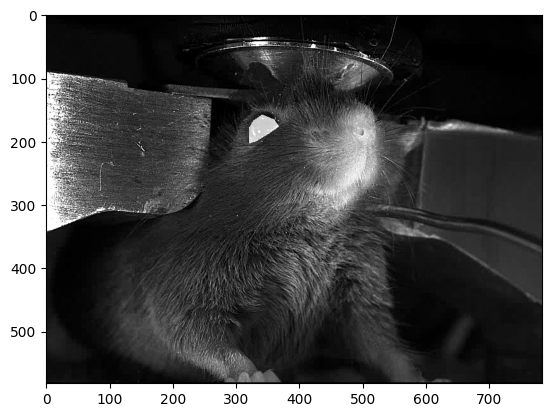

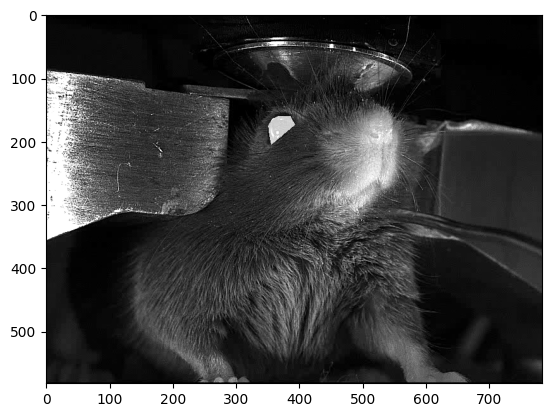

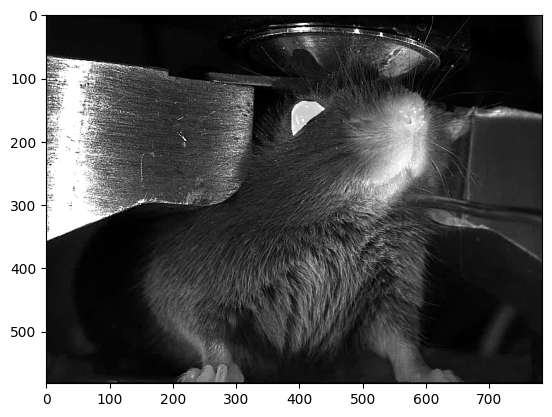

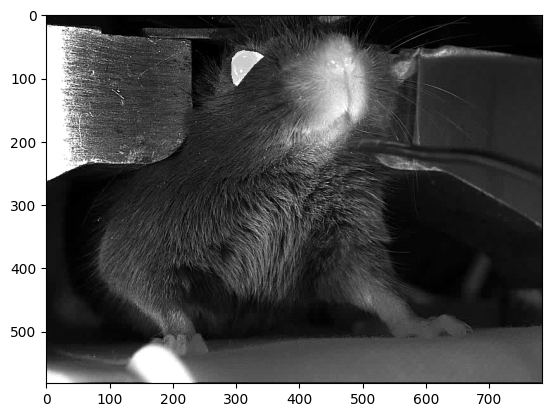

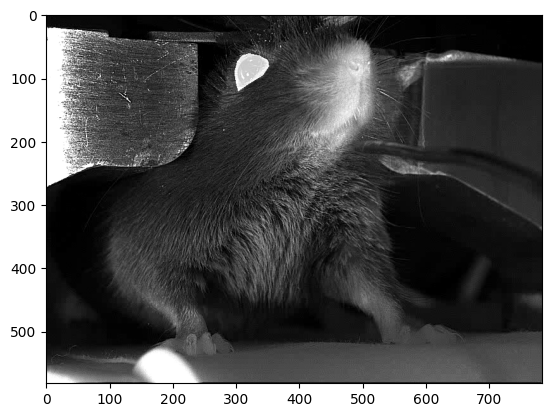

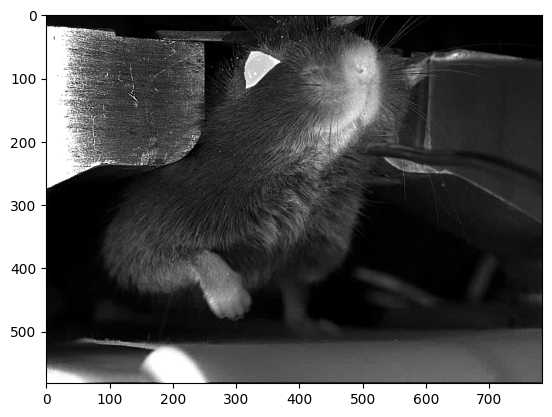

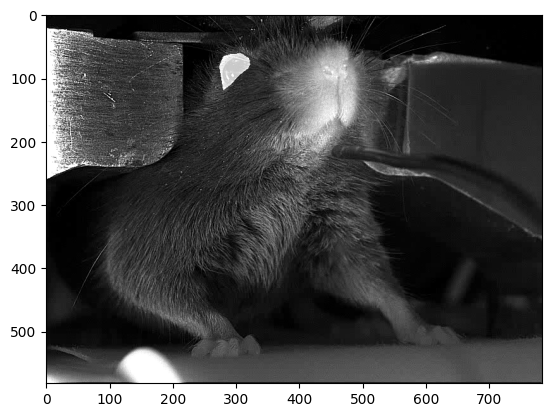

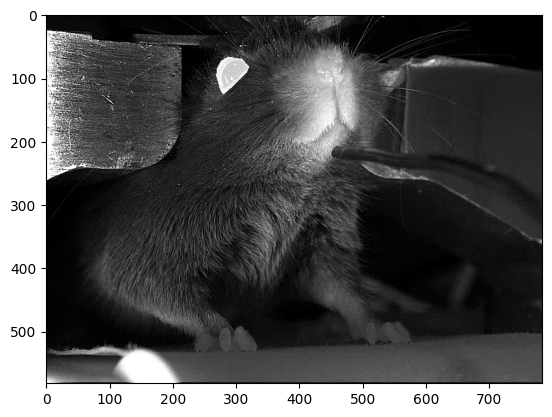

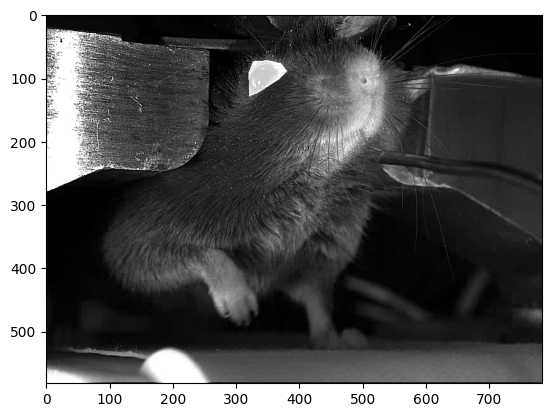

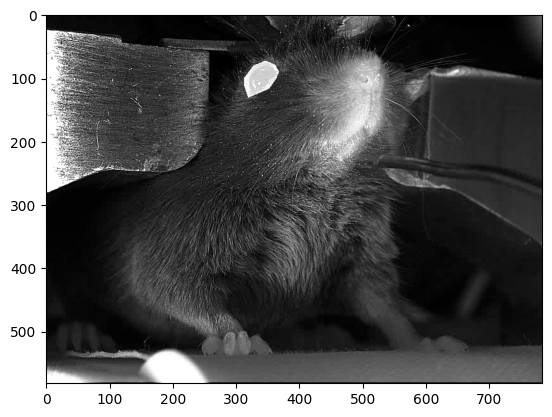

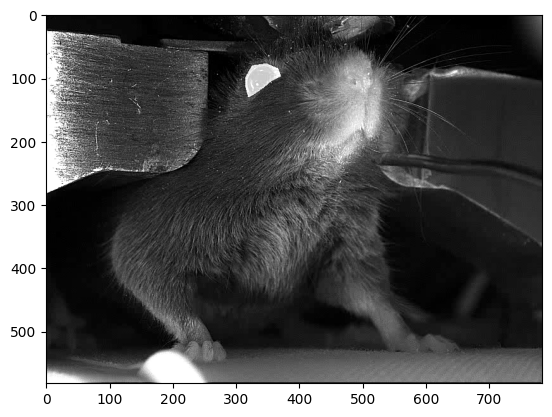

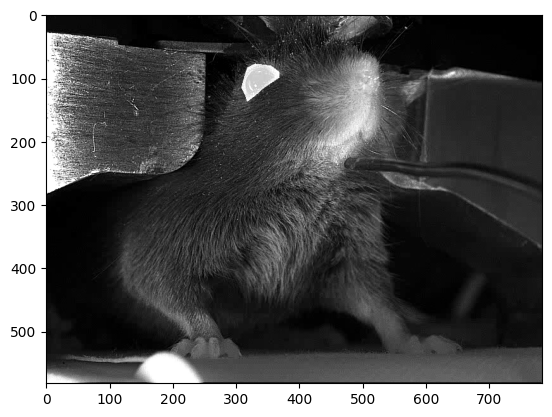

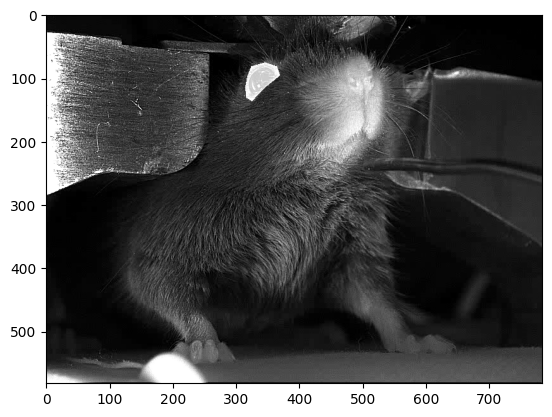

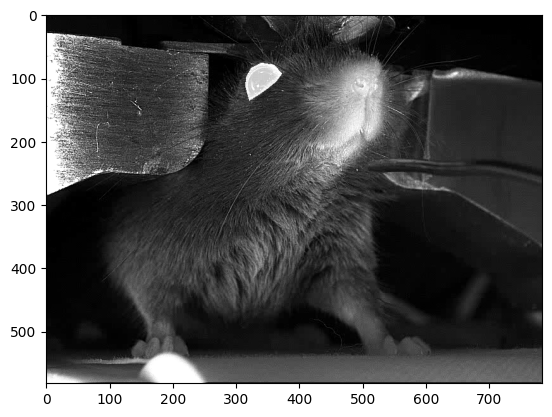

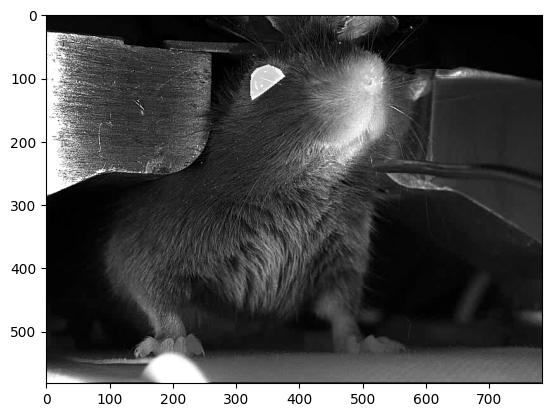

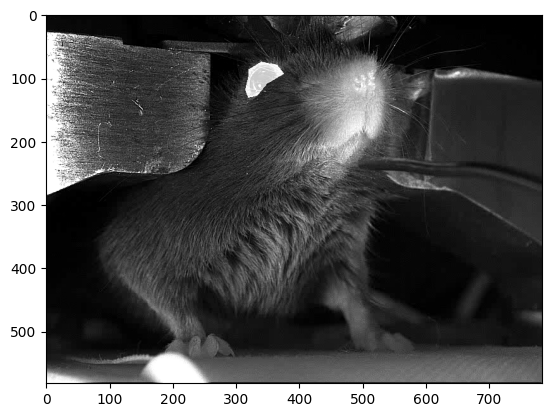

In [52]:
%matplotlib inline

for path, im in images.items():
    plt.figure()
    plt.imshow(im + masks[path][...,None]*200)
#     break

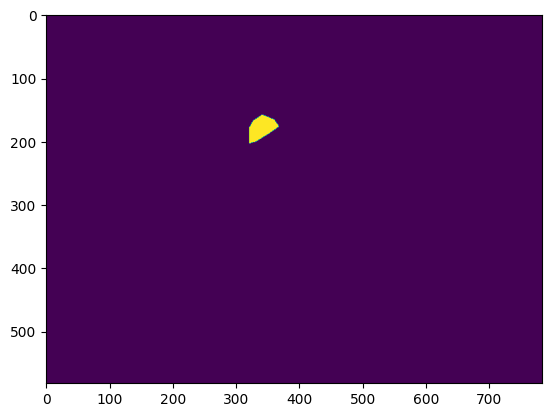

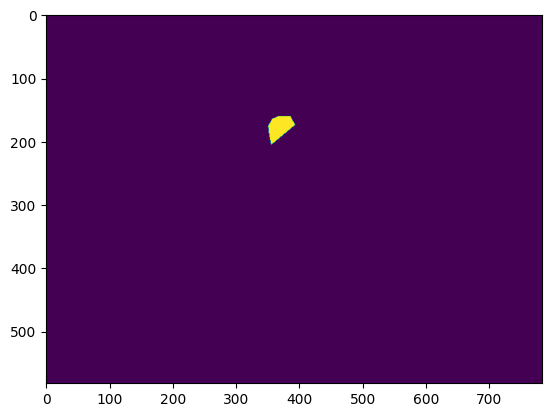

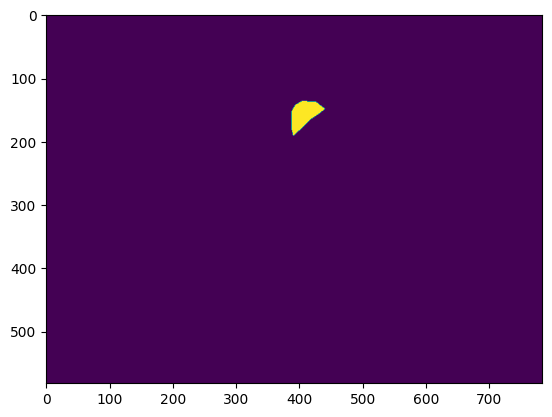

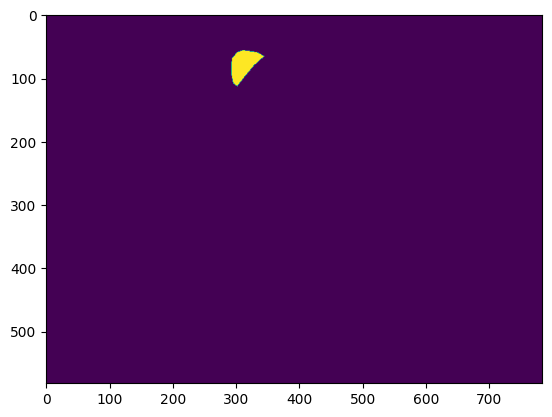

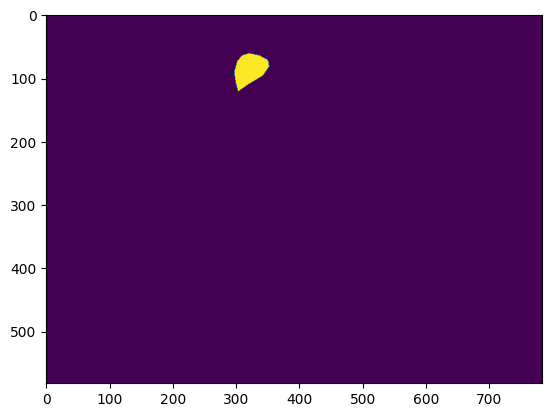

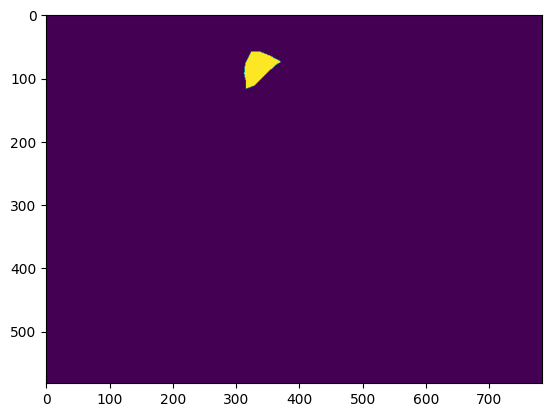

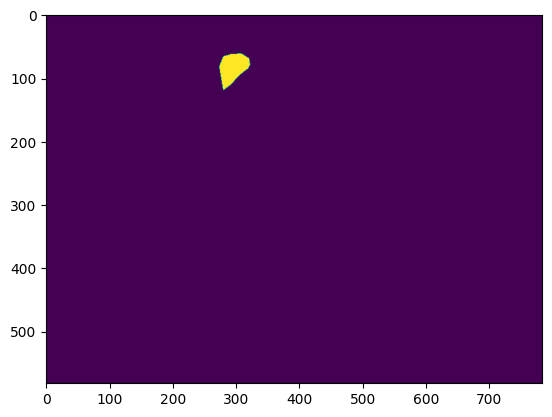

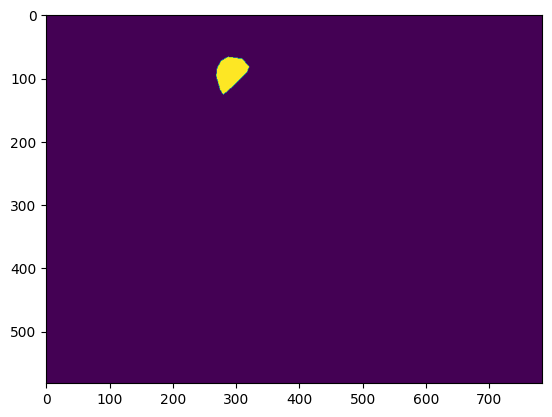

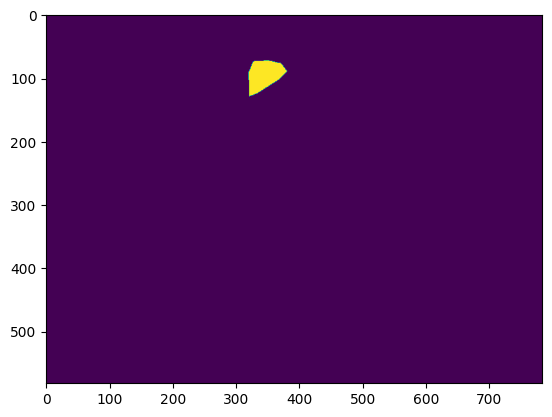

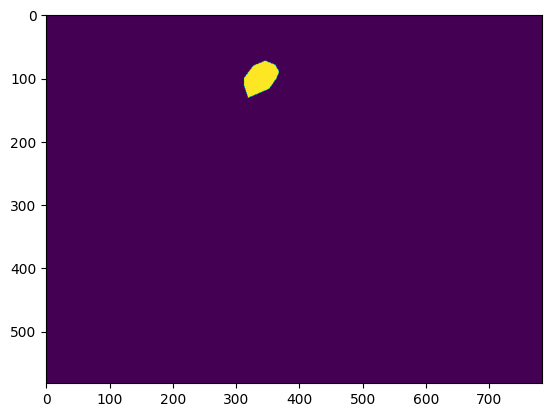

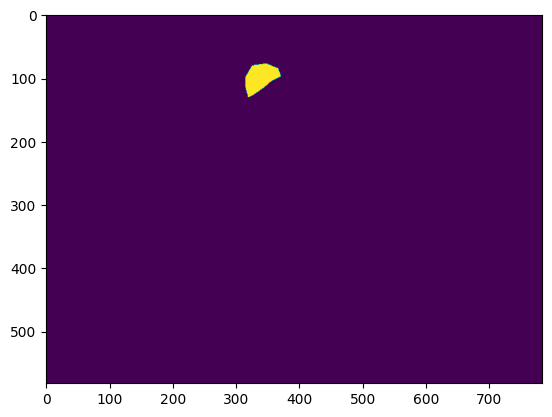

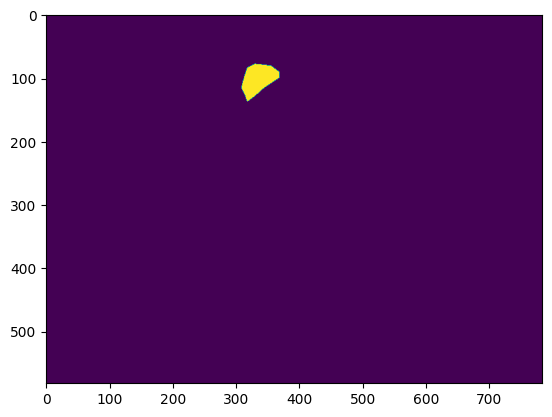

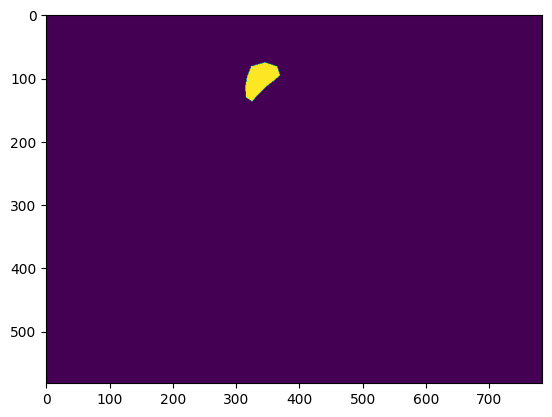

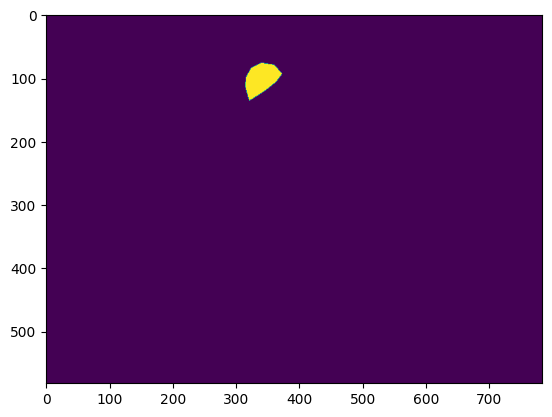

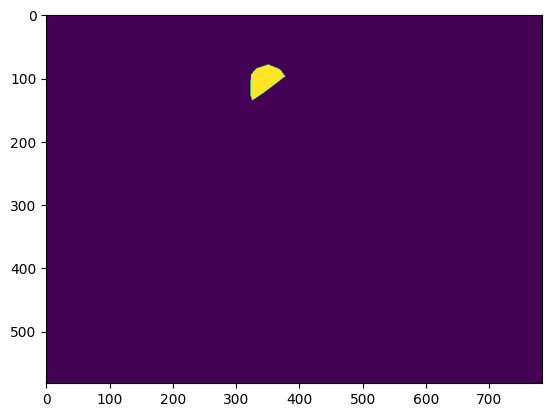

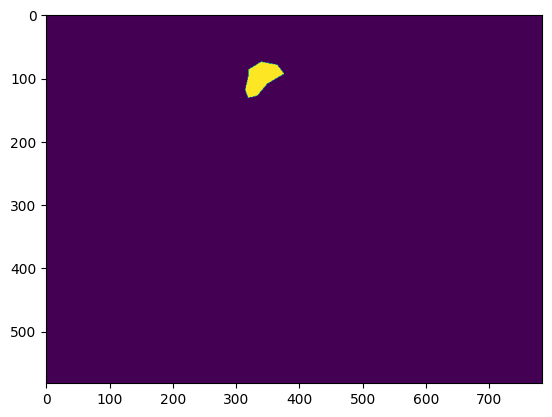

In [51]:
%matplotlib inline

for date, roi in rois.items():
    plt.figure()
    plt.imshow(roi.mask_frames[0])

# Below is for example trace extraction. Best to use the o2 scripts

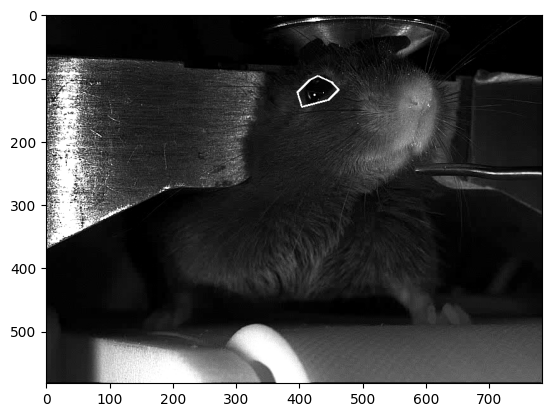

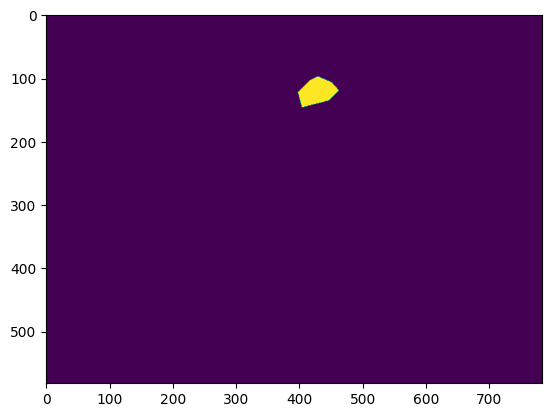

In [8]:
%matplotlib inline
plt.figure()
plt.imshow(rois['/mnt/MICROSCOPE/Gyu/BMI_data/cage_0322/mouse_0322N/20230430/camera_data/exp/cam4/cam42023-04-30T13_04_58.avi'].mask_frames[0])

In [8]:
path_mask = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/mask.npy'

np.save(path_mask, roi.mask_frames[0])

In [13]:
path_mask = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/masks/20230430/mask_cam42023-04-30T13_04_58.npy'

In [14]:
path_vid = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam42023-05-01T10_48_48.avi'


In [16]:
import decord

In [17]:
DEVICE = bnpm.torch_helpers.set_device(use_GPU=False)

mask = torch.as_tensor(np.load(path_mask), dtype=torch.float32).to(DEVICE)
vid = decord.VideoReader(path_vid, ctx=decord.cpu(0))

prepare_frames = lambda f: torch.as_tensor(f.asnumpy()[...,0], dtype=torch.float32).to(DEVICE)
extract_trace = lambda f: torch.einsum('fhw,hw -> f', prepare_frames(f), mask)

trace_start = torch.cat([extract_trace(v) for v in bnpm.indexing.make_batches(vid, batch_size=100, length=10000)], dim=0)

idx_fastForward = int(60*59 * vid.get_avg_fps())

trace_end = torch.cat([extract_trace(v) for v in bnpm.indexing.make_batches(vid, batch_size=100, idx_start=idx_fastForward)], dim=0)


get_diff_smooth = lambda x: np.diff(bnpm.timeSeries.simple_smooth(x, sig=4), n=1)

idx_start = np.argmax(get_diff_smooth(trace_start))

idx_end = np.argmin(get_diff_smooth(trace_end)) + idx_fastForward

device: 'cpu'


[15:16:52] /github/workspace/src/video/video_reader.cc:83: ERROR opening: /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam42023-05-01T10_48_48.avi, No such file or directory


RuntimeError: Error reading /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam42023-05-01T10_48_48.avi...

In [6]:
idx_start

1438

In [7]:
idx_end

433672

In [4]:
mask = np.load(path_mask)

In [5]:
path_vid = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam42023-05-01T10_48_48.avi'

# vid = bnpm.video.BufferedVideoReader(paths_videos=[path_vid], buffer_size=1000, verbose=2)

In [13]:
vid = decord.VideoReader(path_vid, decord.cpu(0))

In [14]:
DEVICE_ein = bnpm.torch_helpers.set_device(use_GPU=False)

mask = torch.as_tensor(mask, dtype=torch.float32).to(DEVICE_ein)
trace_start = torch.cat([torch.einsum('fhw,hw -> f', torch.as_tensor(v.asnumpy()[...,0], dtype=torch.float32).to(DEVICE_ein), mask) for v in tqdm(bnpm.indexing.make_batches(vid, batch_size=100, length=10000))], dim=0)

device: 'cpu'


100it [00:16,  5.96it/s]


In [8]:
frame_endStart = int(60*59 * vid.get_avg_fps())

trace_end = torch.cat([torch.einsum('fhw,hw -> f', torch.as_tensor(v.asnumpy()[...,0], dtype=torch.float32).to(DEVICE_ein), mask) for v in tqdm(bnpm.indexing.make_batches(vid, batch_size=100, idx_start=frame_endStart))], dim=0)

101it [00:17,  5.79it/s]


In [9]:
get_peak = lambda x: np.argmax(np.diff(bnpm.timeSeries.simple_smooth(x, sig=4), n=1))

get_trough = lambda x: np.argmin(np.diff(bnpm.timeSeries.simple_smooth(x, sig=4), n=1))

idx_start = get_peak(trace_start)

idx_end = get_trough(trace_end) + frame_endStart

In [10]:
idx_start

1438

In [11]:
idx_end

433672

In [12]:
bnpm.file_helpers.pickle_save(
    obj={
        'idx_start': idx_start,
        'idx_end': idx_end,
        'path_vid': path_vid,
        'path_mask': path_mask,
    },
    filepath=r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/idx_laser.pkl',
)

In [28]:
import pandas as pd

In [30]:
csv = pd.read_csv(r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/times_cam42023-05-01T10_48_48.csv', header=None)

In [31]:
csv

0          1           2           3  \
0       1879048192  418574653  1590732029  1590732029   
1       1879048192  418574654  1591005442  1591005442   
2       1879048192  418574655  1591277829  1591277829   
3       1879048192  418574656  1591551248  1591551248   
4       1879048192  418574657  1591824643  1591824643   
...            ...        ...         ...         ...   
434819  1879048192  419009472  2920662623  2920662623   
434820  1879048192  419009473  2920936042  2920936042   
434821  1879048192  419009474  2921208423  2921208423   
434822  1879048192  419009475  2921481872  2921481872   
434823  1879048192  419009476  2921755284  2921755284   

                                  4  
0       2023-05-01T10:48:48.8074240  
1       2023-05-01T10:48:48.8136576  
2       2023-05-01T10:48:48.8214784  
3       2023-05-01T10:48:48.8298752  
4       2023-05-01T10:48:48.8386688  
...                             ...  
434819  2023-05-01T11:49:12.3902848  
434820  2023-05-01T11:49:12.3982208  
434821  2023-05-01T11:49:12.4065280  
434822  2023-05-01T11:49:12.4148736  
434823  2023-05-01T11:49:12.4232064  

[434824 rows x 5 columns]

In [32]:
test = csv[4].to_numpy().astype('datetime64')

In [208]:
(test[idx_end] - test[idx_start]).astype(np.float32) / 1000000000

3602.725732352

In [33]:
(test[idx_end] - test[idx_start]).astype(np.float32) / 1000000000

3602.042847232

In [34]:
times = bnpm.indexing.moduloCounter_to_linearCounter(csv[2].to_numpy(), 2**32, plot_pref=False)

In [210]:
(times[idx_end] - times[idx_start])/2**25

3602.7726957201958

In [35]:
(times[idx_end] - times[idx_start])/2**25

3602.0818551182747

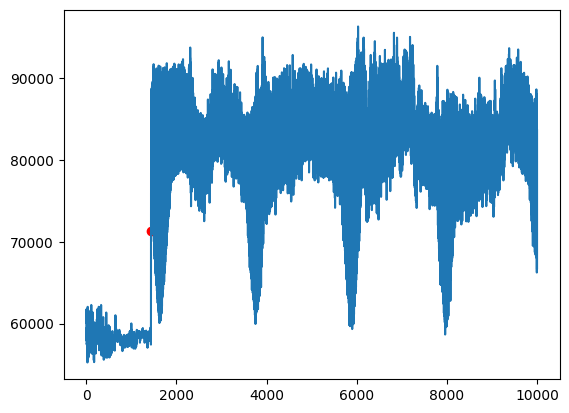

In [36]:
plt.figure()
plt.plot(trace_start)
plt.scatter(idx_start, trace_start[idx_start], c='r')

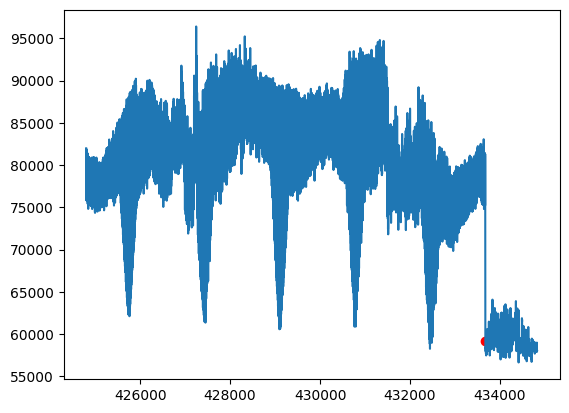

In [37]:
plt.figure()
plt.plot(np.arange(trace_end.shape[0]) + frame_endStart, trace_end)
plt.scatter(idx_end, trace_end[idx_end - frame_endStart], c='r')

In [38]:
ws = bnpm.h5_handling.simple_load(r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230430/exp_0001.h5')

In [48]:
get_peak(ws['sweep_0001']['analogScans'][1][:1000])

101

In [51]:
(get_trough(ws['sweep_0001']['analogScans'][1]) - get_peak(ws['sweep_0001']['analogScans'][1]))/1000

3602.73

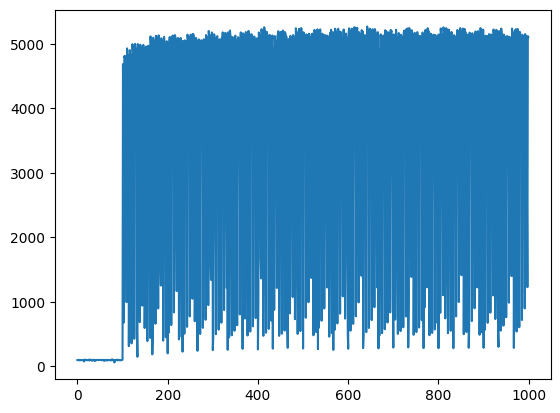

In [47]:
plt.figure()
plt.plot(ws['sweep_0001']['analogScans'][1][:1000])